# 读取包和设好环境

In [1]:
from IPython.display import display
from IPython.display import clear_output
import PIL
import numpy as np
import time
import os
from matplotlib.pyplot import imshow
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import sys
from matplotlib import cm
import seaborn as sns
import tensorflow as tf
import tensorlayer as tl

In [42]:
tf.reset_default_graph()

In [3]:
tf.logging.set_verbosity(tf.logging.DEBUG)
tl.logging.set_verbosity(tl.logging.DEBUG)

In [4]:
sess = tf.InteractiveSession()

# 数据读取

In [35]:
raw_RAD_id_list = os.listdir('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/')
print(len(raw_RAD_id_list))

5000


In [36]:
start_time = time.time()
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))
RAD_id_list = []
for (i, RAD_id) in enumerate(raw_RAD_id_list):
    sum_list = []
    for k in range(61):
        sum_list.append(np.array(PIL.Image.open('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png'
                         % (RAD_id, RAD_id,
                        k))).astype(np.int8).ravel().sum())
    sum_list = np.array(sum_list)
    if i % 100 == 0:
        print(time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time)))
        print(i, sum_list[:7])
    if sum_list.mean() < 251001 * 0:
        continue
    for k in range(59):
        if abs(sum_list[k] + sum_list[k + 2] - 2 * sum_list[k + 1]) > 251001 * 2:
            continue
    RAD_id_list.append(RAD_id)
print(time.strftime('end time: %Y-%m-%d %H:%M:%S', time.localtime()))
print(time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time)))
print(len(RAD_id_list))

start time: 2018-08-10 16:17:47
00:00:00
0 [-218731 -223051 -219804 -220007 -214895 -215379 -215980]
00:00:04
100 [234582 237819 229433 245301 248393 240381 223353]
00:00:09
200 [160256 204332 211280 280902 295750 352426 358017]
00:00:13
300 [-176391 -152608 -144375 -133992 -118109 -105886 -106325]
00:00:18
400 [908957 957476 934137 916795 906131 913580 938224]
00:00:22
500 [-206606 -212619 -218223 -216854 -223904 -219665 -226577]
00:00:27
600 [-161574 -161458 -165310 -164261 -163069 -169710 -168272]
00:00:31
700 [1951344  188499  171837  151332  150477  142457  124003]
00:00:36
800 [-69382 -51706 -30304 -12627  12087  15137  41947]
00:00:41
900 [-214099 -212040 -207336 -200398 -191997 -194556 -193007]
00:00:46
1000 [1376909 1436172 1463413 1498177 1520122 1560300 1615684]
00:00:50
1100 [-146327 -148117 -148605 -150131 -150245 -151917 -154946]
00:00:55
1200 [107576 122831 104013  90320 113905 101212 101117]
00:00:59
1300 [ 16077  23864  16170   5567   -683  -4791 -22141]
00:01:04
1400 

In [9]:
a = np.array(sum_list)

In [10]:
a.mean()

-114115.95081967213

In [11]:
a.var()

6278063296.768073

In [32]:
l = list(range(20))

In [33]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [34]:
for i, j in enumerate(l):
    print(i, j)
    del l[i]
    continue

0 0
1 2
2 4
3 6
4 8
5 10
6 12
7 14
8 16
9 18


In [ ]:
l

In [ ]:
'/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train'

In [ ]:
RAD_id = 'RAD_436582464219533'
a = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 10))).astype(np.int8)

In [ ]:
a

In [ ]:
plt.imshow(a, cmap=cm.gist_ncar_r)

In [37]:
def read_by_RAD_id(RAD_id, step_size):
    x_matrix = np.empty((6, 501, 501))
    x_matrix[0] = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 0))).astype(np.int8)
    x_matrix[1] = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 1))).astype(np.int8)
    x_matrix[2] = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 2))).astype(np.int8)
    x_matrix[3] = x_matrix[1] - x_matrix[0]
    x_matrix[4] = x_matrix[2] - x_matrix[1]
    x_matrix[5] = x_matrix[2] - x_matrix[0]
    y_matrix = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 3))).astype(np.int8)
    x_matrix = np.stack(x_matrix, axis=-1)
    x_matrix = x_matrix / 80
    y_matrix = y_matrix.reshape(501, 501, 1)
    y_matrix = y_matrix / 80
    return ([x_matrix], [y_matrix])

In [ ]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
# prepare data
# X_train, y_train, X_val, y_val, X_test, y_test = tl.files.load_mnist_dataset(shape=(-1, 784))

# define placeholder
x = tf.placeholder(tf.float32, shape=[None, 501, 501, 6], name='x')
y_ = tf.placeholder(tf.float32, shape=[None, 501, 501, 1], name='y_')

# define the network
network = tl.layers.InputLayer(x, name='input')
network = tl.layers.Conv2d(network, n_filter=64, filter_size=(3,3), act=tf.nn.relu)
network = tl.layers.DropoutLayer(network, keep=0.8)
network = tl.layers.Conv2d(network, n_filter=32, filter_size=(3,3), act=tf.nn.relu)
network = tl.layers.DropoutLayer(network, keep=0.8)
network = tl.layers.Conv2d(network, n_filter=1, filter_size=(3,3), act=tf.nn.tanh)

# define cost function and metric.
y = network.outputs
cost = tf.losses.mean_squared_error(y, y_, weights=y_)
# cost = tl.cost.mean_squared_error(y, y_)

# define the optimizer
train_params = network.all_params
train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost, var_list=train_params)

# initialize all variables in the session
tl.layers.initialize_global_variables(sess)

# print network information
network.print_params()
network.print_layers()

n_epoch = 2
batch_size = 500
print_freq = 5
sum_cost = 0

for epoch in range(n_epoch):
    start_time = time.time()
    for i, RAD_id in enumerate(RAD_id_list[:2000]):
        X_train, Y_train = read_by_RAD_id(RAD_id, 5)
        feed_dict = {x: X_train, y_: Y_train}
        feed_dict.update(network.all_drop)  # enable noise layers
        train_cost, _ = sess.run([cost, train_op], feed_dict=feed_dict)
        if i % 100 == 0:
            print(sum_cost * 10**10)
            sum_cost = 0
        else:
            sum_cost += train_cost / (y_train[0].sum() + 251001)

#     if epoch + 1 == 1 or (epoch + 1) % print_freq == 0:
#         print("Epoch %d of %d took %fs" % (epoch + 1, n_epoch, time.time() - start_time))
#         train_loss, train_acc, n_batch = 0, 0, 0
#         for X_train_a, y_train_a in tl.iterate.minibatches(X_train, y_train, batch_size, shuffle=True):
#             dp_dict = tl.utils.dict_to_one(network.all_drop)  # disable noise layers
#             feed_dict = {x: X_train_a, y_: y_train_a}
#             feed_dict.update(dp_dict)
#             err, ac = sess.run([cost, acc], feed_dict=feed_dict)
#             train_loss += err
#             train_acc += ac
#             n_batch += 1
#         print("   train loss: %f" % (train_loss / n_batch))
#         print("   train acc: %f" % (train_acc / n_batch))
#         val_loss, val_acc, n_batch = 0, 0, 0
#         for X_val_a, y_val_a in tl.iterate.minibatches(X_val, y_val, batch_size, shuffle=True):
#             dp_dict = tl.utils.dict_to_one(network.all_drop)  # disable noise layers
#             feed_dict = {x: X_val_a, y_: y_val_a}
#             feed_dict.update(dp_dict)
#             err, ac = sess.run([cost, acc], feed_dict=feed_dict)
#             val_loss += err
#             val_acc += ac
#             n_batch += 1
#         print("   val loss: %f" % (val_loss / n_batch))
#         print("   val acc: %f" % (val_acc / n_batch))

# print('Evaluation')
# test_loss, test_acc, n_batch = 0, 0, 0
# for X_test_a, y_test_a in tl.iterate.minibatches(X_test, y_test, batch_size, shuffle=True):
#     dp_dict = tl.utils.dict_to_one(network.all_drop)  # disable noise layers
#     feed_dict = {x: X_test_a, y_: y_test_a}
#     feed_dict.update(dp_dict)
#     err, ac = sess.run([cost, acc], feed_dict=feed_dict)
#     test_loss += err
#     test_acc += ac
#     n_batch += 1
# print("   test loss: %f" % (test_loss / n_batch))
# print("   test acc: %f" % (test_acc / n_batch))

[TL] InputLayer  input: (?, 501, 501, 6)
[TL] Conv2d conv2d: n_filter: 64 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] DropoutLayer dropout_layer: keep: 0.800000 is_fix: False
[TL] Conv2d conv2d: n_filter: 32 filter_size: (3, 3) strides: (1, 1) pad: SAME act: relu
[TL] DropoutLayer dropout_layer: keep: 0.800000 is_fix: False
[TL] Conv2d conv2d: n_filter: 1 filter_size: (3, 3) strides: (1, 1) pad: SAME act: tanh
[TL]   param   0: conv2d/kernel:0      (3, 3, 6, 64)      float32_ref (mean: 0.000340430618962273, median: 0.0003317559603601694, std: 0.017674485221505165)   
[TL]   param   1: conv2d/bias:0        (64,)              float32_ref (mean: 0.0               , median: 0.0               , std: 0.0               )   
[TL]   num of params: 3520
[TL]   layer   0: x:0                  (?, 501, 501, 6)    float32
[TL]   layer   1: conv2d/Relu:0        (?, 501, 501, 64)    float32
[TL]   layer   2: dropout_layer/mul:0  (?, 501, 501, 64)    float32
[TL]   layer   3: conv2d_1

In [57]:
print(a)

420.0251


In [56]:
a = sess.run(cost, feed_dict=feed_dict)

In [59]:
x_train

[array([[[-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         ...,
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ]],
 
        [[-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         ...,
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ]],
 
        [[-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  0.    ],
         [-0.0125, -0.0125, -0.0125,  0.    ,  0.    ,  

In [61]:
tl.utils.predict(sess, network, x_train, x, y_op)

NameError: name 'y_op' is not defined

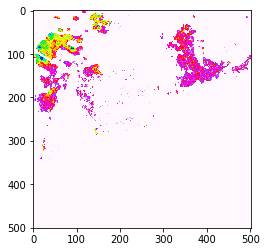

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


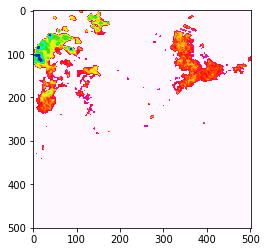


------------------------------------



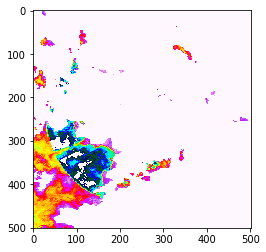

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


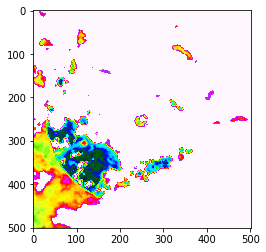


------------------------------------



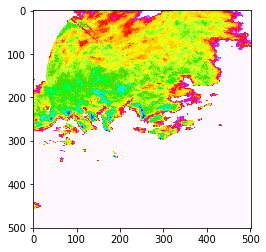

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


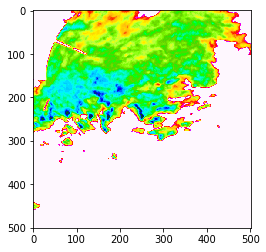


------------------------------------



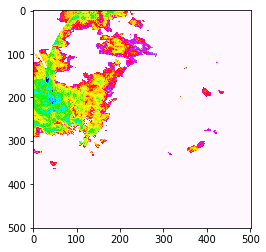

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


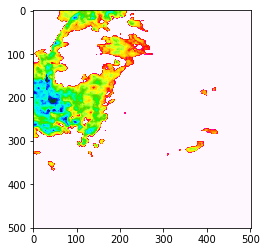


------------------------------------



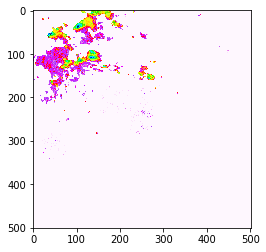

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


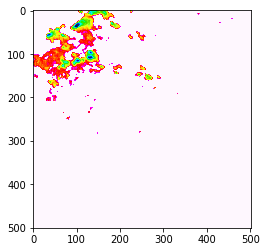


------------------------------------



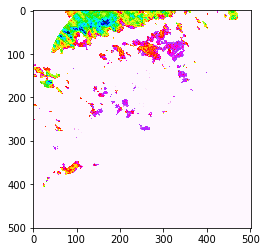

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


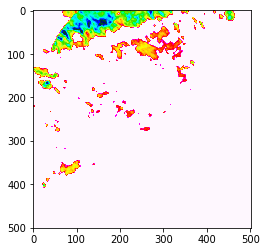


------------------------------------



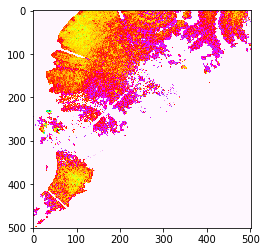

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


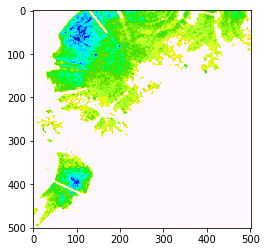


------------------------------------



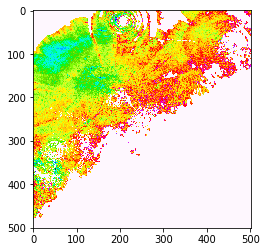

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


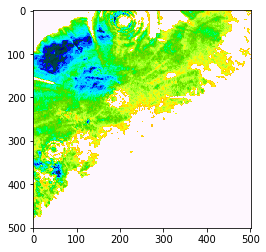


------------------------------------



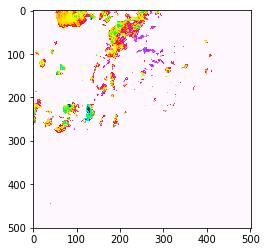

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


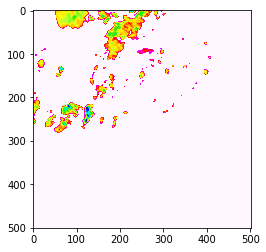


------------------------------------



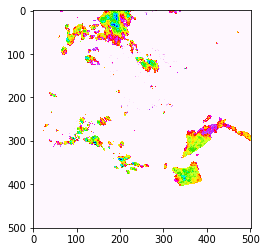

↓↓↓下面的是模型的输出，上面的是真实值↑↑↑


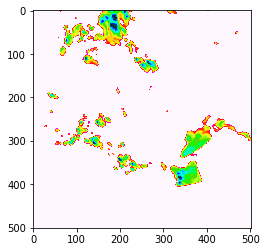


------------------------------------



In [122]:
y = network.outputs
for i, RAD_id in enumerate(RAD_id_list[-10:]):
    X_validation, Y_validation = read_by_RAD_id(RAD_id, 5)
    Y = tl.utils.predict(sess, network, X_validation, x, y)
    Y = Y.reshape((501, 501)) * 100
    Y = Y.astype(np.int8)
    Y = np.where(Y<10, -1, Y)
    plt.imshow(Y_validation[0].reshape((501,501)), cmap=cm.gist_ncar_r)
    plt.show()
    print('↓↓↓下面的是模型的输出，上面的是真实值↑↑↑')
    plt.imshow(Y, cmap=cm.gist_ncar_r)
    plt.show()
    print('\n------------------------------------\n')

In [121]:
Y

array([[ 3,  3,  3, ...,  3,  3, -1],
       [ 4,  4,  4, ...,  4,  4, -1],
       [ 4,  4,  4, ...,  4,  4, -1],
       ...,
       [ 4,  4,  4, ...,  4,  4, -1],
       [ 4,  4,  4, ...,  4,  5, -1],
       [-1, -1, -1, ..., -1,  3, -1]], dtype=int8)

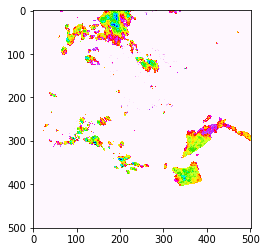

In [110]:
plt.imshow(y_train[0].reshape((501,501)), cmap=cm.gist_ncar_r)

In [91]:
y_train[0]

array([[[-0.0125],
        [-0.0125],
        [-0.0125],
        ...,
        [-0.0125],
        [-0.0125],
        [-0.0125]],

       [[-0.0125],
        [-0.0125],
        [-0.0125],
        ...,
        [-0.0125],
        [-0.0125],
        [-0.0125]],

       [[-0.0125],
        [-0.0125],
        [-0.0125],
        ...,
        [-0.0125],
        [-0.0125],
        [-0.0125]],

       ...,

       [[-0.0125],
        [-0.0125],
        [-0.0125],
        ...,
        [-0.0125],
        [-0.0125],
        [-0.0125]],

       [[-0.0125],
        [-0.0125],
        [-0.0125],
        ...,
        [-0.0125],
        [-0.0125],
        [-0.0125]],

       [[-0.0125],
        [-0.0125],
        [-0.0125],
        ...,
        [-0.0125],
        [-0.0125],
        [-0.0125]]])